In [66]:
from google.colab import files
files.upload()

Saving Medicaldataset.csv to Medicaldataset.csv


{'Medicaldataset.csv': b'Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result\r\n64,1,66,160,83,160,1.8,0.012,negative\r\n21,1,94,98,46,296,6.75,1.06,positive\r\n55,1,64,160,77,270,1.99,0.003,negative\r\n64,1,70,120,55,270,13.87,0.122,positive\r\n55,1,64,112,65,300,1.08,0.003,negative\r\n58,0,61,112,58,87,1.83,0.004,negative\r\n32,0,40,179,68,102,0.71,0.003,negative\r\n63,1,60,214,82,87,300,2.37,positive\r\n44,0,60,154,81,135,2.35,0.004,negative\r\n67,1,61,160,95,100,2.84,0.011,negative\r\n44,0,60,166,90,102,2.39,0.006,negative\r\n63,0,60,150,83,198,2.39,0.013,negative\r\n64,1,60,199,99,92,3.43,5.37,positive\r\n54,0,94,122,67,97,1.42,0.012,negative\r\n47,1,76,120,70,319,2.57,0.003,negative\r\n61,1,81,118,66,134,1.49,0.017,positive\r\n86,0,73,114,68,87,1.11,0.776,positive\r\n45,0,70,100,68,96,0.606,0.004,negative\r\n37,0,72,107,86,274,2.89,0.003,negative\r\n45,1,60,109,65,89,1.6,0.02,positive\r\n60,1,92,151,78,301,1.6,0.005,negative\r\

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

In [68]:
data = pd.read_csv('Medicaldataset.csv')
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [70]:
data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [71]:
data.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [72]:
encoder = LabelEncoder()
data['Result'] = encoder.fit_transform(data['Result'])
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [73]:
correlation_matrix = data.corr()
important_features = correlation_matrix['Result'].drop('Result').abs().sort_values(ascending=False)
print(important_features)

Age                         0.238097
Troponin                    0.229376
CK-MB                       0.217720
Gender                      0.094432
Blood sugar                 0.033059
Systolic blood pressure     0.020825
Diastolic blood pressure    0.009659
Heart rate                  0.006920
Name: Result, dtype: float64


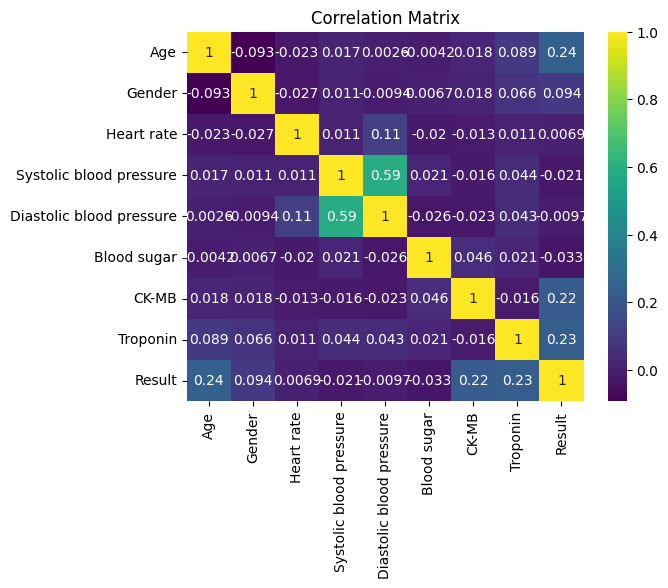

In [74]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [104]:
the_most_important = important_features.index[:5]
print(the_most_important)

Index(['Age', 'Troponin', 'CK-MB', 'Gender', 'Blood sugar'], dtype='object')


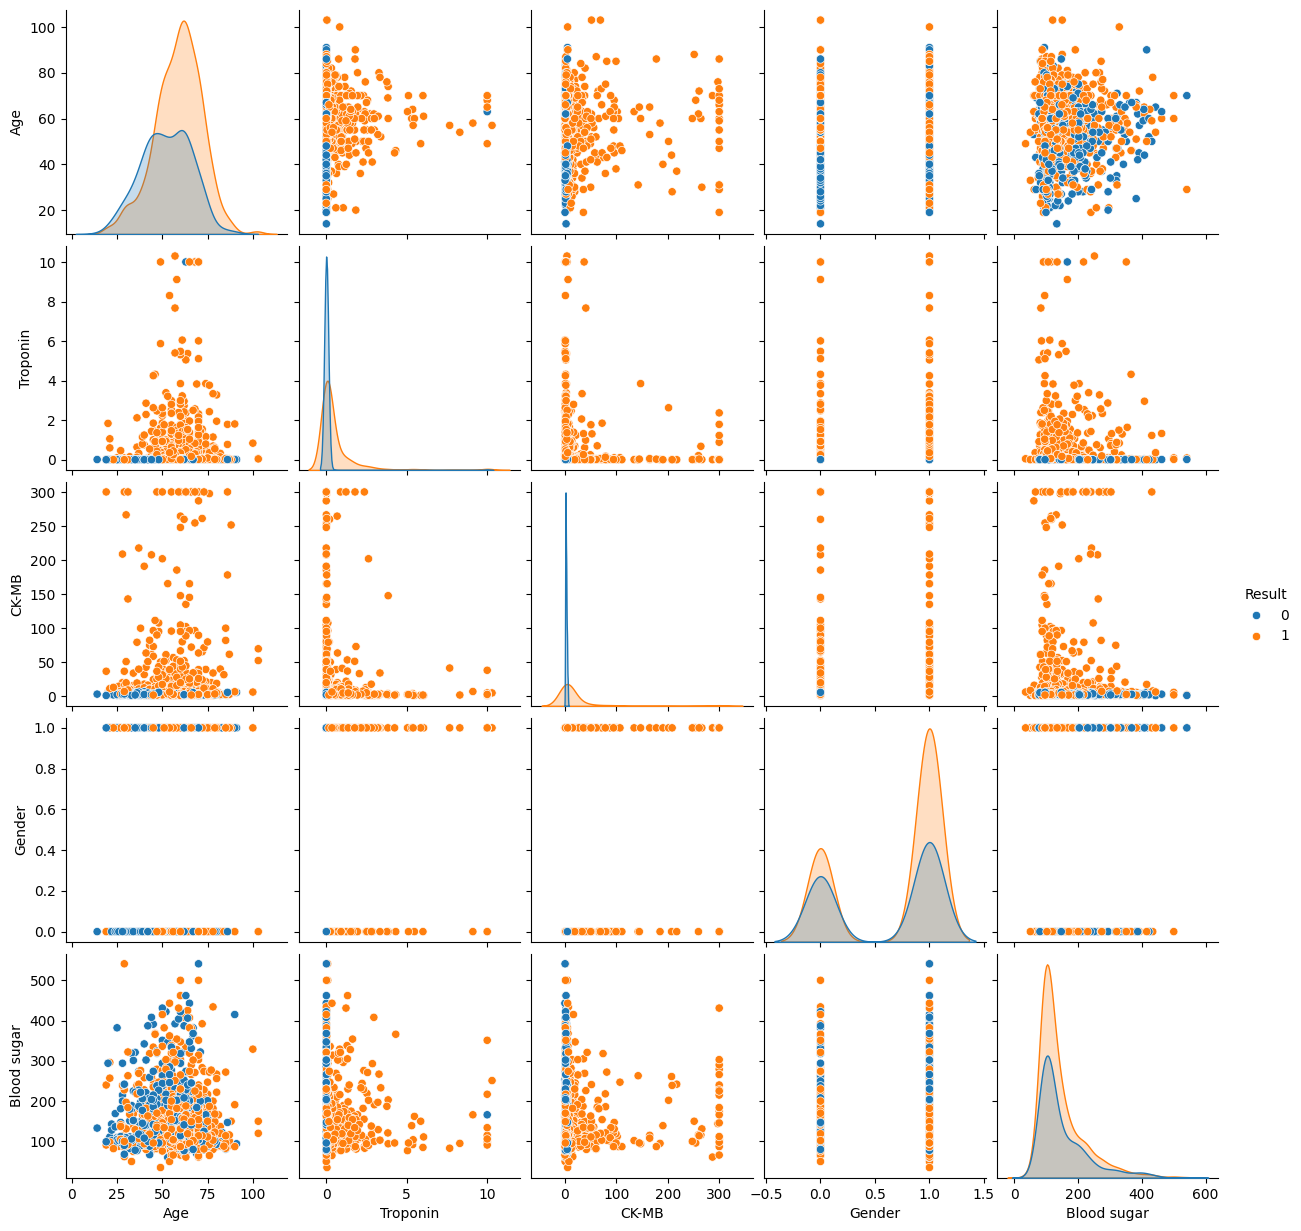

In [144]:
sns.pairplot(data[list(the_most_important) + ['Result']], hue='Result')
plt.show()

In [105]:
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


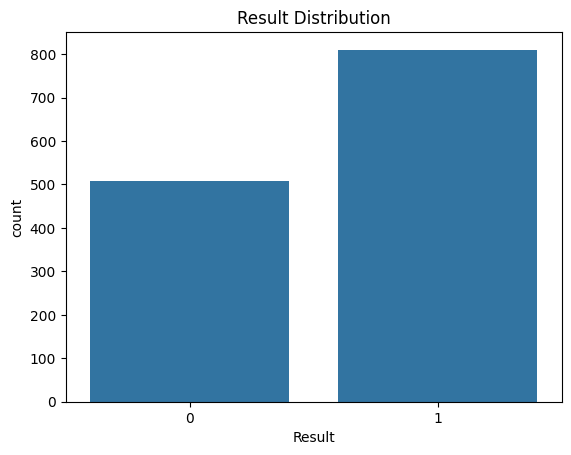

In [106]:
sns.countplot(x='Result', data=data)
plt.title('Result Distribution')
plt.show()

In [107]:
X = data[the_most_important]
y = data['Result']

In [108]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print("Before:", y.value_counts())
print("After:", y_res.value_counts())

Before: Result
1    810
0    509
Name: count, dtype: int64
After: Result
0    810
1    810
Name: count, dtype: int64


In [109]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [110]:
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [111]:
y_pred = model.predict(x_test)

In [112]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8271604938271605

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       168
           1       0.84      0.79      0.82       156

    accuracy                           0.83       324
   macro avg       0.83      0.83      0.83       324
weighted avg       0.83      0.83      0.83       324


Confusion Matrix:
 [[144  24]
 [ 32 124]]


In [114]:
model2 = SVC(kernel='linear', class_weight='balanced')
model2.fit(x_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [115]:
y_pred = model2.predict(x_test)

In [117]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8611111111111112

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       168
           1       0.92      0.78      0.84       156

    accuracy                           0.86       324
   macro avg       0.87      0.86      0.86       324
weighted avg       0.87      0.86      0.86       324


Confusion Matrix:
 [[158  10]
 [ 35 121]]


In [141]:
model3 = RandomForestClassifier(n_estimators=50, class_weight='balanced', max_depth=5)
model3.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50)

In [142]:
y_pred = model3.predict(x_test)

In [143]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9876543209876543

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       168
           1       0.99      0.99      0.99       156

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324


Confusion Matrix:
 [[166   2]
 [  2 154]]
